In [35]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os,time
import tensorflow as tf
import seaborn as sns

In [3]:
# loading image dataset from keras dataset
mnist = tf.keras.datasets.mnist

In [5]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

In [6]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
# finding the shape of x_train
X_train_full.shape

(60000, 28, 28)

In [8]:
y_train_full.shape

(60000,)

In [9]:
# finding out single image data
X_train_full[100]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

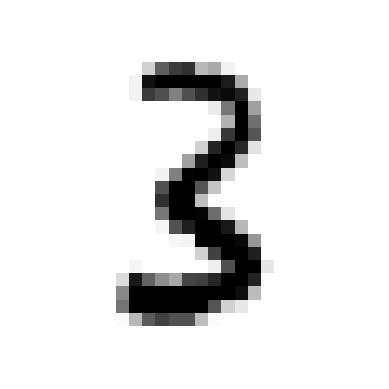

In [13]:
# visualizing single image
plt.imshow(X_train_full[50000],cmap = 'binary')
plt.axis("off")
plt.show()

<Axes: >

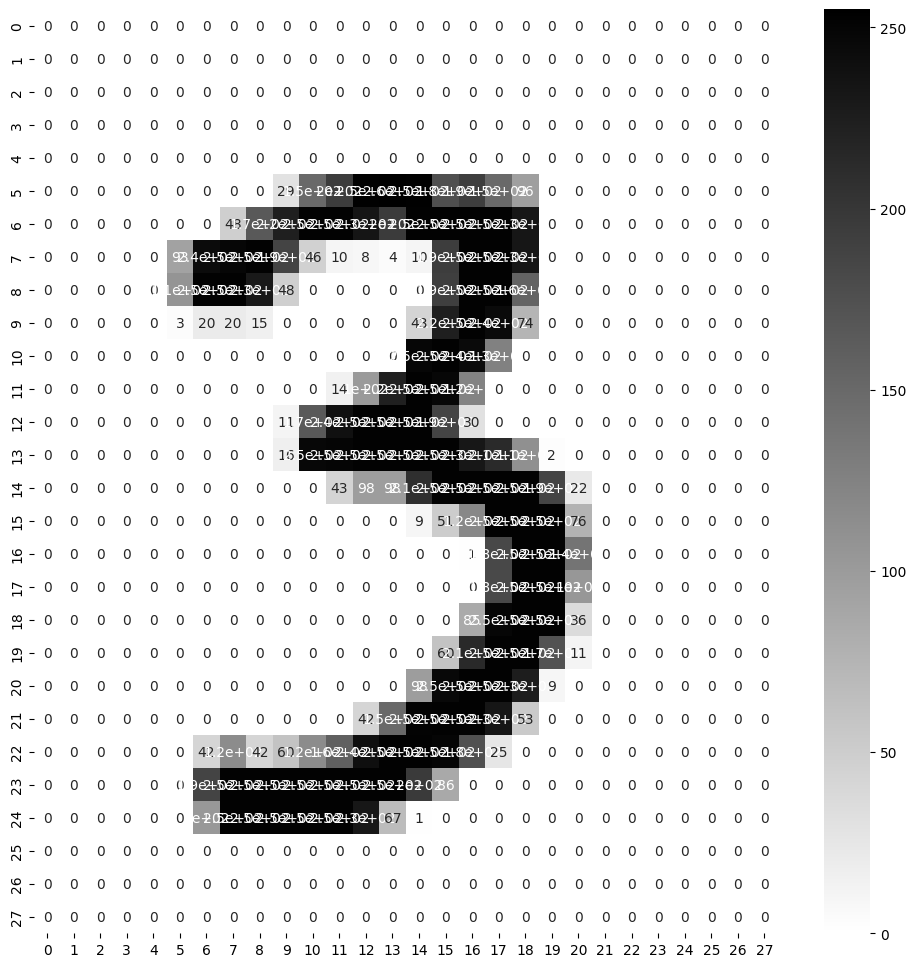

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(X_train_full[10000],annot=True,cmap="binary")

In [16]:
y_train_full

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
# splitting X_train_full and X_test_full for validation
# performed normalization
# Scale the data between 0 to 1 by dividing it by 255.as its an unsigned data between 0-255 range .This process is called "unit scaling"
X_valid,X_train = X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]


In [18]:
# scale the test set as well
X_test = X_test/255.

In [19]:
print(X_valid.shape)
print(X_train.shape)
print(y_valid.shape)
print(y_train.shape)

(5000, 28, 28)
(55000, 28, 28)
(5000,)
(55000,)


<Axes: >

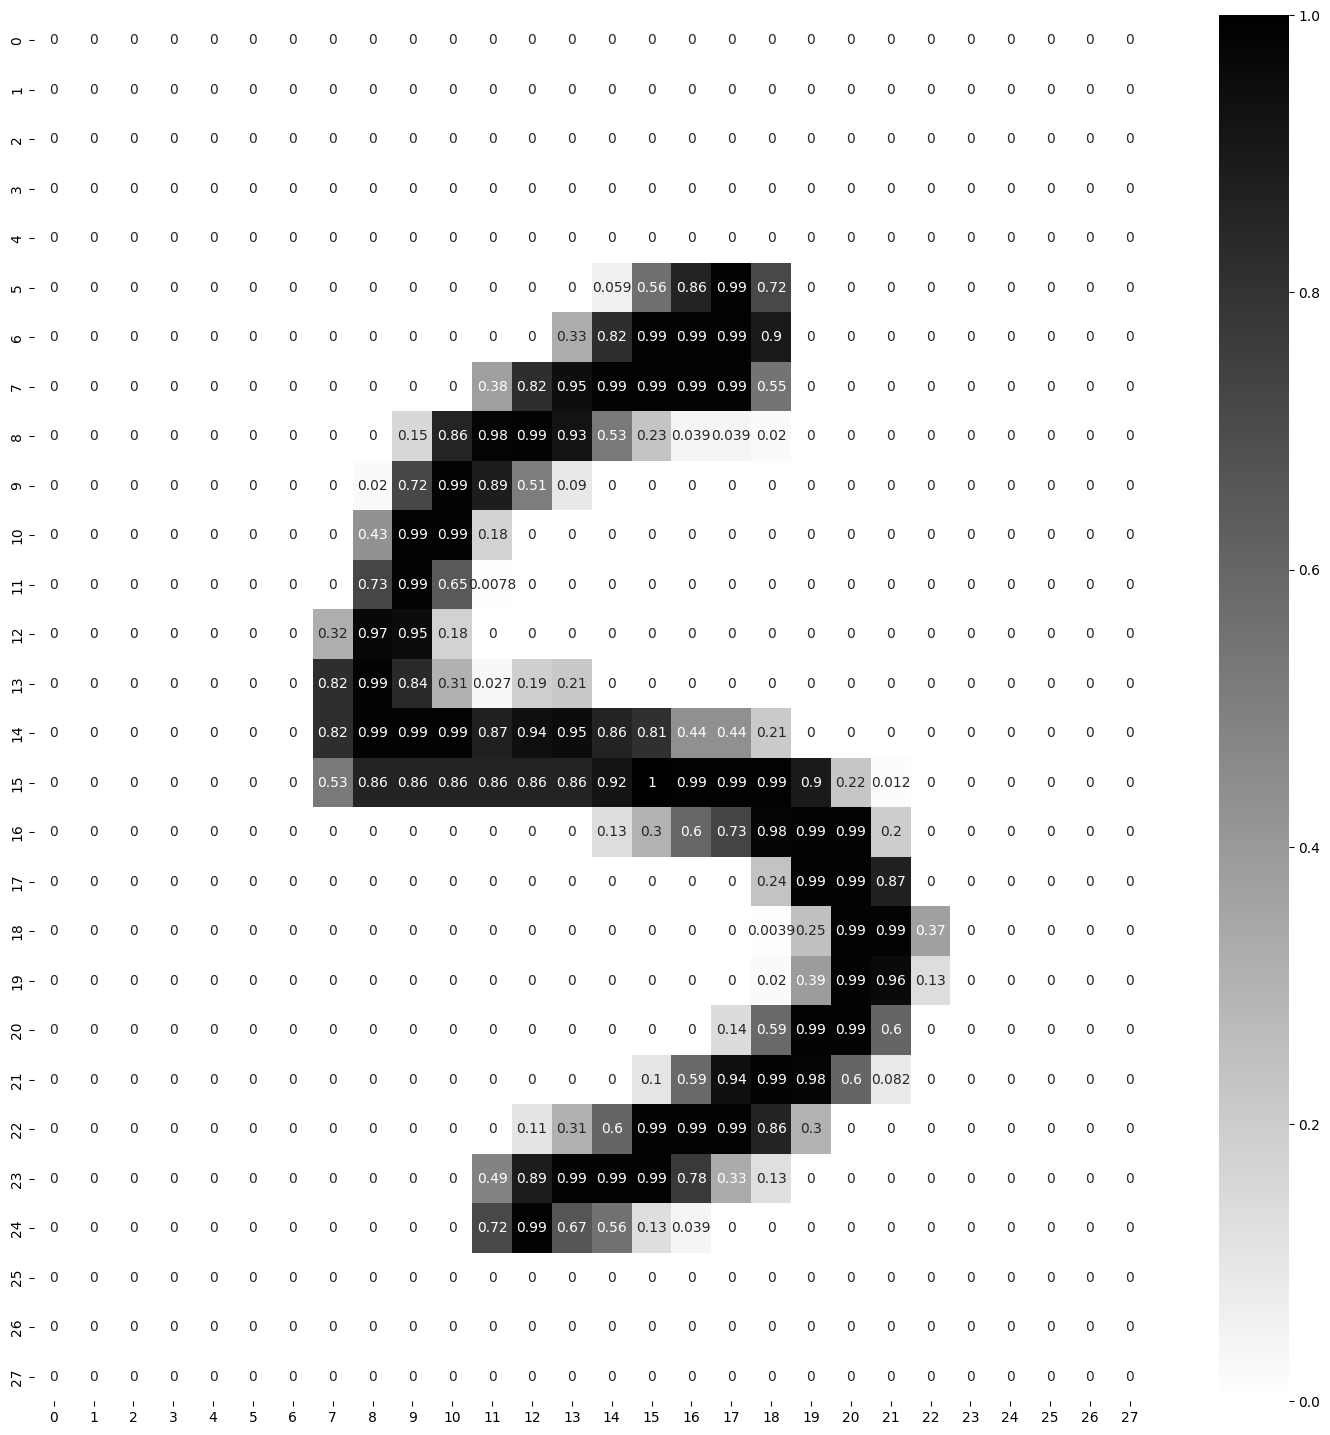

In [21]:

plt.figure(figsize=(18,18))
sns.heatmap(X_train[10000],annot=True,cmap="binary")

In [22]:
# Creating function to flatten the 2D array to 1D array
LAYERS = [tf.keras.layers.Flatten(input_shape = [28,28],name = "inputlayer"),
          tf.keras.layers.Dense(300,activation = 'relu',name = "hiddenlayer1"),
          tf.keras.layers.Dense(100,activation = 'relu',name = "hiddenlayer2"),
          tf.keras.layers.Dense(10,activation = 'softmax',name = "outputlayer"),
          ]

In [24]:
# Creating a model for training and prediction purpose
model_clf = tf.keras.models.Sequential(LAYERS)

In [25]:
# Checking the model summary
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# defining loss_function,optimizer,metrics
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "ADAM"
METRICS = ["accuracy"]

In [27]:
# Compiling the model
model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [28]:
model_clf.layers

In [29]:
# layers details
model_clf.layers[0].name

'inputlayer'

In [31]:
# Checking the weights,bais assigned before training in each layer
weights,bais = model_clf.layers[1].get_weights()

In [42]:
weights

array([[ 0.05873729,  0.02490395,  0.02754733, ...,  0.03166071,
         0.05717878, -0.0094638 ],
       [-0.02893275, -0.03574151, -0.02888335, ..., -0.00741084,
        -0.02138133,  0.01059303],
       [-0.02362975, -0.02184518,  0.06521498, ...,  0.0732812 ,
        -0.02843444, -0.06320982],
       ...,
       [-0.04609124, -0.06906858,  0.067839  , ..., -0.04626777,
        -0.01750543,  0.04709852],
       [-0.00522096, -0.07180617,  0.05940583, ..., -0.02451355,
         0.05780435, -0.00814735],
       [ 0.00513253,  0.03021975, -0.04946282, ...,  0.0662912 ,
         0.0252816 , -0.06677528]], dtype=float32)

In [33]:
# Setting Epochs and validation_data for training purpose
EPOCHS = 5
VALIDATION_SET = (X_valid,y_valid)


In [34]:
# Training the model
history = model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET)


Epoch 1/5
1719/1719 [==============================] - 14s 4ms/step - loss: 0.2114 - accuracy: 0.9364 - val_loss: 0.1063 - val_accuracy: 0.9680
Epoch 2/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0860 - accuracy: 0.9733 - val_loss: 0.0798 - val_accuracy: 0.9770
Epoch 3/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0589 - accuracy: 0.9810 - val_loss: 0.0899 - val_accuracy: 0.9750
Epoch 4/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0452 - accuracy: 0.9858 - val_loss: 0.0804 - val_accuracy: 0.9764
Epoch 5/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0339 - accuracy: 0.9888 - val_loss: 0.0987 - val_accuracy: 0.9722


In [37]:
# Creating a function to save model
def saveModel_path(model_dir="content/SAVED_MODELS/"):
  os.makedirs(model_dir,exist_ok=True)
  filename = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(model_dir,filename)
  print(f"Your model saved in : {model_path}")
  return model_path

In [38]:
# saving the model
model_clf.save(saveModel_path())

Your model saved in : content/SAVED_MODELS/Model_2023_09_21_11_05_01_.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
# checking the parameters
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

In [40]:
# checking loss and accuracy
history.history

{'loss': [0.21140968799591064,
  0.08598113805055618,
  0.05885772034525871,
  0.045229289680719376,
  0.03394120931625366],
 'accuracy': [0.9363999962806702,
  0.9733272790908813,
  0.9809636473655701,
  0.9858182072639465,
  0.9887818098068237],
 'val_loss': [0.1063462421298027,
  0.07979845255613327,
  0.08994480222463608,
  0.08035104721784592,
  0.09870321303606033],
 'val_accuracy': [0.9679999947547913,
  0.9769999980926514,
  0.9750000238418579,
  0.9764000177383423,
  0.9721999764442444]}

In [41]:
# visualizing history in a DataFrame
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.211410,0.936400,0.106346,0.9680
1,0.085981,0.973327,0.079798,0.9770
2,0.058858,0.980964,0.089945,0.9750
3,0.045229,0.985818,0.080351,0.9764
4,0.033941,0.988782,0.098703,0.9722


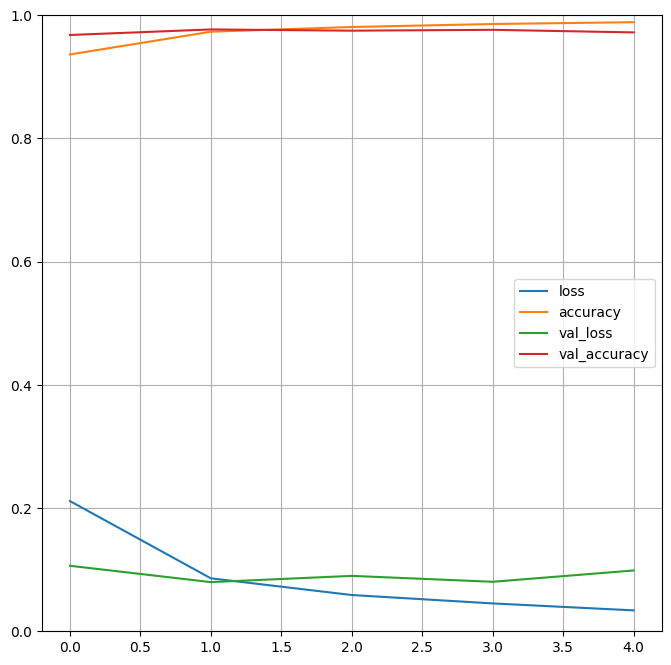

In [43]:
# Plotting loss,accuracy,val_loss and val_accuracy
pd.DataFrame(history.history).plot(figsize = (8,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [46]:
# Prediction
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1148 - accuracy: 0.9698


[0.11484485864639282, 0.9697999954223633]

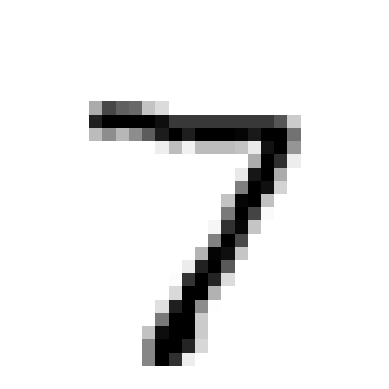

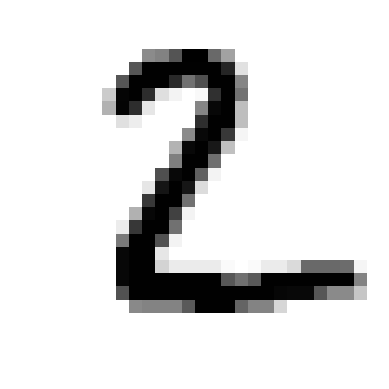

In [50]:
# Single value prediction
# visualizing single image

for i in range(2):
  plt.imshow(X_test[i],cmap = 'binary')
  plt.axis("off")
  plt.show()

In [51]:
# It returns the probability value of each class
prediction = model_clf.predict(X_test[:2])

1/1 [==============================] - 0s 124ms/step


In [54]:
# This record is having tendency to belong to 7
prediction[0].round(2)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [55]:
# This record is having tendency to belong to 2
prediction[1].round(2)

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [57]:
# np.argmax it gives the index of the max value
np.argmax(prediction[0].round(2))

7

In [58]:
np.argmax(prediction[1].round(2))

2

In [60]:
# Loading saved model
from tensorflow.keras.models import load_model

In [61]:
model = load_model("/content/content/SAVED_MODELS/Model_2023_09_21_11_05_01_.h5")

In [62]:
model.predict(X_test[:3])

1/1 [==============================] - 0s 51ms/step


array([[4.36400464e-11, 5.20569943e-09, 9.64158744e-08, 4.38596800e-07,
        5.08557987e-11, 1.90065230e-09, 1.07889744e-13, 9.99999404e-01,
        5.38802725e-10, 5.40660423e-08],
       [1.26001849e-08, 9.28390804e-08, 9.99999881e-01, 1.22577912e-08,
        1.25126905e-13, 5.36688784e-11, 9.52467922e-13, 4.69105761e-11,
        8.31865687e-09, 6.47859655e-14],
       [1.61300022e-08, 9.99870539e-01, 4.08025862e-08, 1.02009186e-10,
        1.09893801e-04, 1.02131548e-08, 4.86021577e-07, 5.15440718e-07,
        1.85833687e-05, 2.53399737e-08]], dtype=float32)